NOAA dataset. Eight  features. Two classes.
10 batches of 86 instances



METHOD: Static knn as classifier
Execution time:  0.02002172839506173
Average MCC:  0.0
Average error: 31.745
Average macro-F1: 0.4923235691037548


C:\Users\raul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\raul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\raul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:516: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(var_yt * var_yp)


Average micro-F1: 0.68
Average Accuracy:  68.255
Standard Deviation:  14.4588403754
Variance:  209.058065


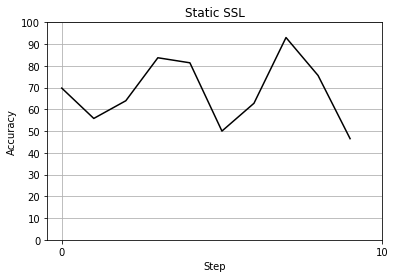

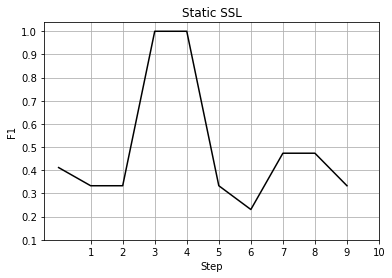

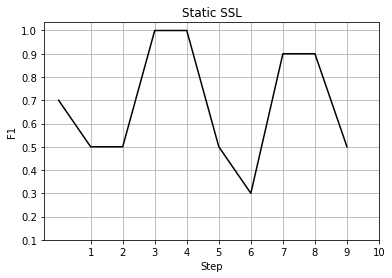




METHOD: Sliding knn as classifier
Execution time:  0.012805925925925887
Average MCC:  0.276459661301
Average error: 30.582
Average macro-F1: 0.7562946857064504
Average micro-F1: 0.8099999999999999
Average Accuracy:  69.418
Standard Deviation:  14.7008631039
Variance:  216.115376


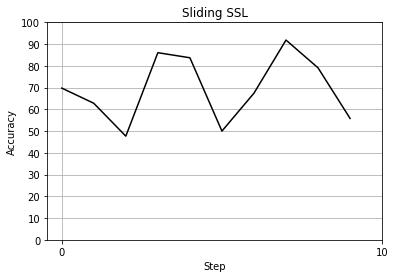

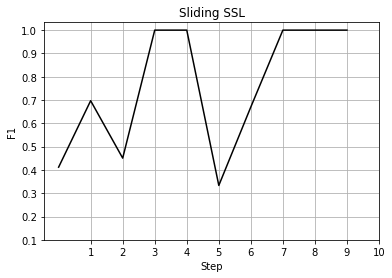

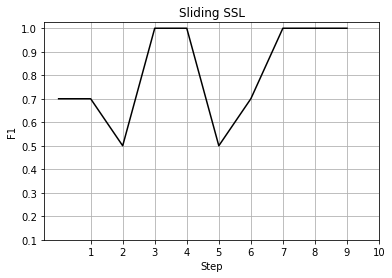




METHOD: Incremental knn as classifier
Execution time:  0.02337580246913573
Average MCC:  0.147715674962
Average error: 23.836
Average macro-F1: 0.6222380990182848
Average micro-F1: 0.75
Average Accuracy:  76.164
Standard Deviation:  9.29189560854
Variance:  86.339324


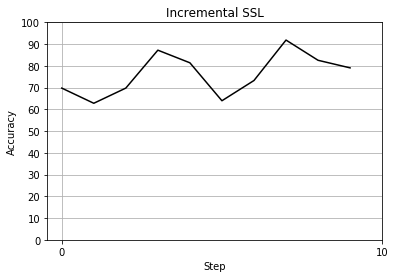

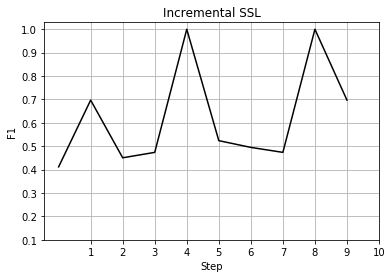

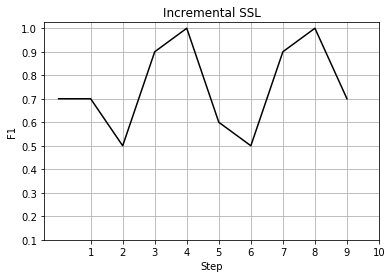




METHOD: knn as classifier and kde as core support extraction with cutting data method
Execution time:  0.0426398024691359
Average MCC:  0.292184082055
Average error: 33.487
Average macro-F1: 0.7531533825651473
Average micro-F1: 0.8099999999999999
Average Accuracy:  66.513
Standard Deviation:  12.597327534
Variance:  158.692661


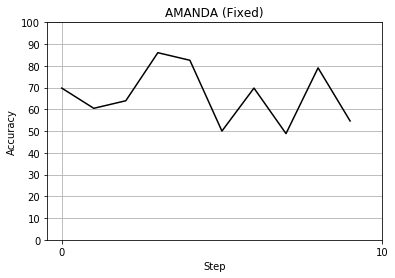

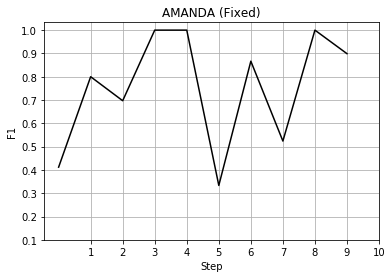

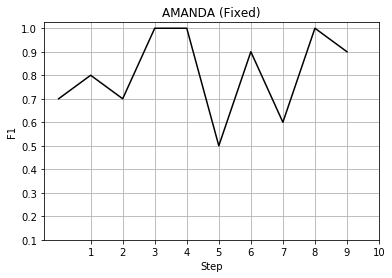




METHOD: knn as classifier and kde and Hellinger distance as dynamic CSE
Execution time:  0.0891757037037042
Average MCC:  0.23680478045
Average error: 28.955
Average macro-F1: 0.7335663029780677
Average micro-F1: 0.79
Average Accuracy:  71.045
Standard Deviation:  15.4567482026
Variance:  238.911065


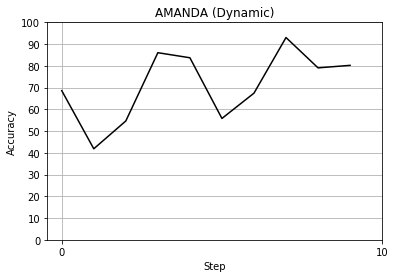

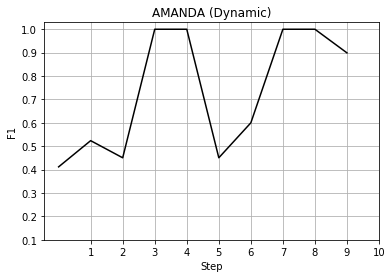

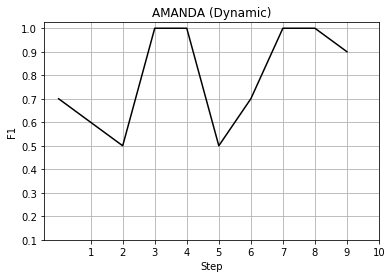




METHOD: None as classifier and GMM with BIC and Mahalanobis as core support extraction
Execution time:  2.6224493827160495
Average MCC:  0.0333333333333
Average error: 33.256
Average macro-F1: 0.5640027670987423
Average micro-F1: 0.7
Average Accuracy:  66.744
Standard Deviation:  17.3656961853
Variance:  301.567404


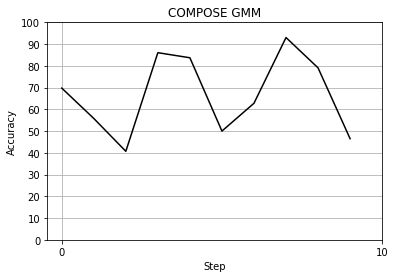

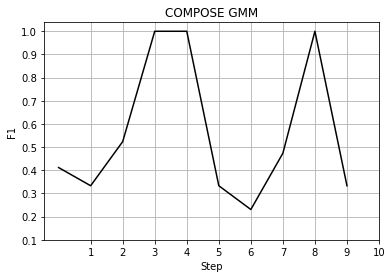

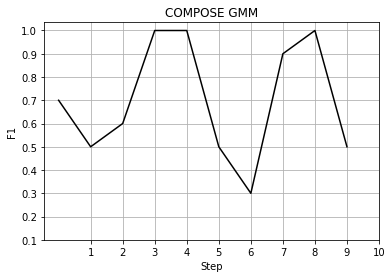

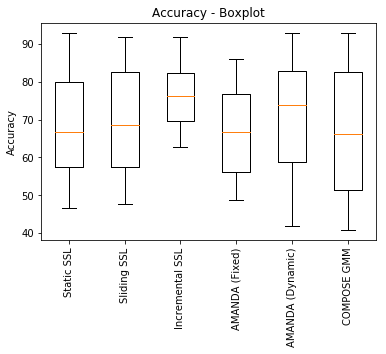

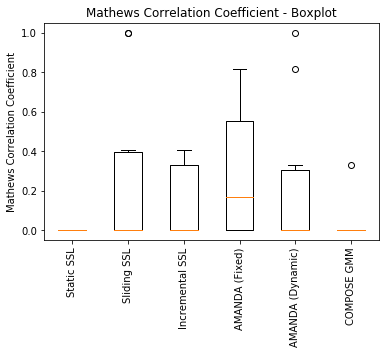

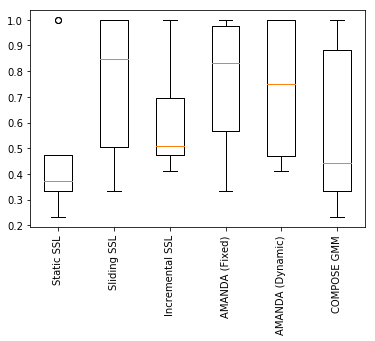

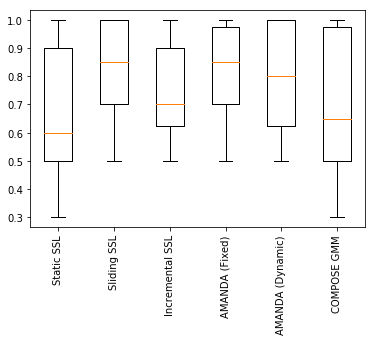

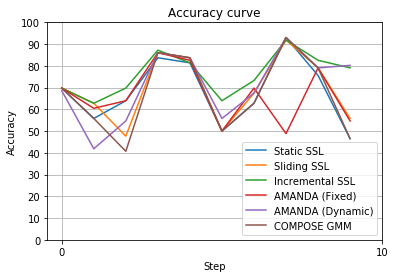

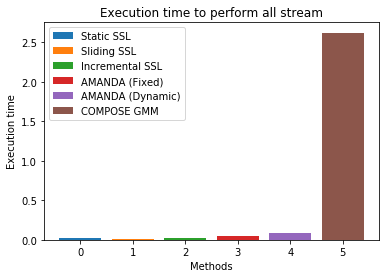

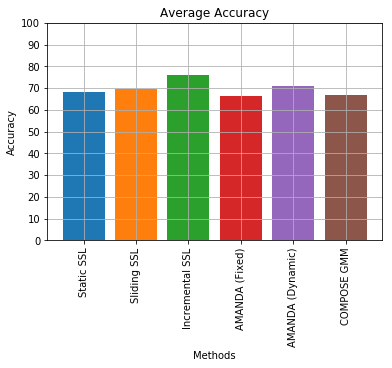

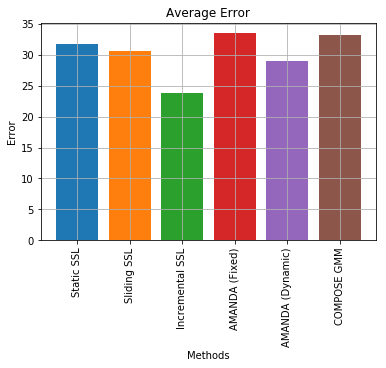

Error reduction: 1.70390447586
Error reduction: 11.5874294923
Error reduction: -2.55219397846
Error reduction: 4.08761262911
Error reduction: -2.2137572339


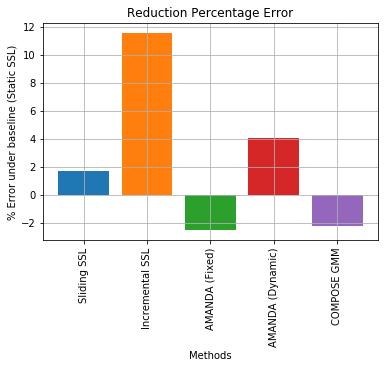

In [1]:
import sys
import os
from pathlib import Path
os.chdir(Path(os.getcwd()).resolve().parents[3])
import psutil
import setup
from methods import runExperiments
from methods import static_classifier
from methods import amanda_dynamic
from methods import amanda_fixed
from methods import incremental_LN
from methods import deslizante_LN
from methods import compose_gmm_version
from methods import prequential_amanda_fixed
from methods import prequential_amanda_dynamic
from methods import prequential_static_classifier
from methods import prequential_deslizante_LN
from methods import prequential_incremental_LN
from methods import prequential_compose_gmm_version


class Experiment():
     def __init__(self, method, K=None, excludingPercentage=None, densityFunction=None, clfName=None):
        self.method = method
        self.clfName = clfName
        self.densityFunction=densityFunction
        self.excludingPercentage = excludingPercentage
        self.K_variation = K


def loadLevelResults(path, sep, key, steps):
    originalAccs, F1s, time = setup.loadLevelIwBoxplotResults(path, sep)
    predictions = F1s[key]
    predictions = [ predictions[i::steps] for i in range(steps) ]
    
    return predictions, originalAccs[key], time[key]


def main():
    experiments = {}
    is_windows = sys.platform.startswith('win')
    sep = '\\'

    if is_windows == False:
        sep = '/'

    path = os.getcwd()+sep+'data'+sep
    
    # SETTINGS
    sslClassifier = 'knn' # lp = label propagation, rf = random forests, cl = cluster and label, knn = k-nn, svm = svm
    steps = 50
    poolSize = None
    isBatchMode = True # False = Stream
    isBinaryClassification = True
    isImbalanced = True
    externalResults = []
    plot_animation = False
    
    # Load dataset
    dataValues, dataLabels, description = setup.loadNOAADataset(path, sep)
    
    # Only 5% of initial labeled data - Extreme verification latency scenario
    labeledData = int(0.05*len(dataLabels))
    '''
    # Static SSL
    #experiments[0] = Experiment(static_classifier, 8, clfName=sslClassifier)
    
    # Sliding SSL
    #experiments[1] = Experiment(deslizante_LN, 8, clfName=sslClassifier)
    
    # Incremental SSL
    #experiments[2] = Experiment(incremental_LN, 8, clfName=sslClassifier)
    
    
    # Proposed Method 1 (AMANDA - Fixed core extraction percentage)
    #experiments[3] = Experiment(amanda_fixed, 8, 0.7, "kde", sslClassifier)
    
    # memory usage
    #process = psutil.Process(os.getpid())
    
    # Proposed method 2 (AMANDA - Dynamic core extraction percentage)
    #experiments[4] = Experiment(amanda_dynamic, 6, None, "kde", sslClassifier)
    
    #print("Memory:", process.memory_info().rss)

    # COMPOSE GMM (Python version)
    #experiments[5] = Experiment(compose_gmm_version, 8)
    '''
    
    #prequential evaluation
    steps = 10
    dataValues, dataLabels = dataValues[:labeledData], dataLabels[:labeledData]
    labeledData = int(0.05*len(dataLabels))
    experiments[0] = Experiment(prequential_static_classifier, 8, clfName=sslClassifier)
    experiments[1] = Experiment(prequential_deslizante_LN, 8, clfName=sslClassifier)
    experiments[2] = Experiment(prequential_incremental_LN, 8, clfName=sslClassifier)
    experiments[3] = Experiment(prequential_amanda_fixed, 8, 0.7, "kde", sslClassifier)
    experiments[4] = Experiment(prequential_amanda_dynamic, 6, None, "kde", clfName=sslClassifier)
    experiments[5] = Experiment(prequential_compose_gmm_version, 8, 0.7)
    
    # levelIw matlab results
    predictionsLevelIw, originalAccsLevelIw, timeLevelIw = loadLevelResults(path, sep, 'noaa', steps)
    externalResults.append({"name":"Level IW", "predictions":predictionsLevelIw, "accuracies":originalAccsLevelIw, "time":timeLevelIw})
    
    # Run experiments
    runExperiments.run(dataValues, dataLabels, description, isBinaryClassification, isImbalanced, 
                       experiments, steps, labeledData, isBatchMode, poolSize, externalResults)
    
    
    

if __name__ == "__main__":
    main()